Data Source [Here](https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv)

# Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

# Importing Data:

In [2]:
df = pd.read_csv('Country-data.csv')
display(df.head())
display(df.describe())
display(df.info())
# Appears to be clean

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


None

In [3]:
pd.set_option('display.max_colwidth', -1)
data = pd.read_csv('data-dictionary.csv')
data.head(10)

Column Name  \
0  country      
1  child_mort   
2  exports      
3  health       
4  imports      
5  Income       
6  Inflation    
7  life_expec   
8  total_fer    
9  gdpp         

                                                                                                        Description  
0  Name of the country                                                                                               
1  Death of children under 5 years of age per 1000 live births                                                       
2  Exports of goods and services per capita. Given as %age of the GDP per capita                                     
3  Total health spending per capita. Given as %age of GDP per capita                                                 
4  Imports of goods and services per capita. Given as %age of the GDP per capita                                     
5  Net income per person                                                                                             
6  The measurement of the annual growth rate of the Total GDP                                                        
7  The average number of years a new born child would live if the current mortality patterns are to remain the same  
8  The number of children that would be born to each woman if the current age-fertility rates remain the same.       
9  The GDP per capita. Calculated as the Total GDP divided by the total population.

# EDA

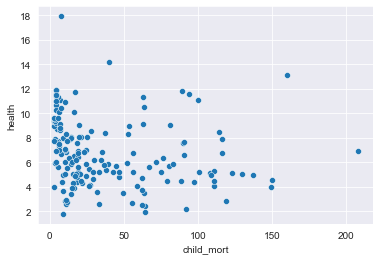

In [4]:
sns.scatterplot(data=df, x="child_mort", y="health")

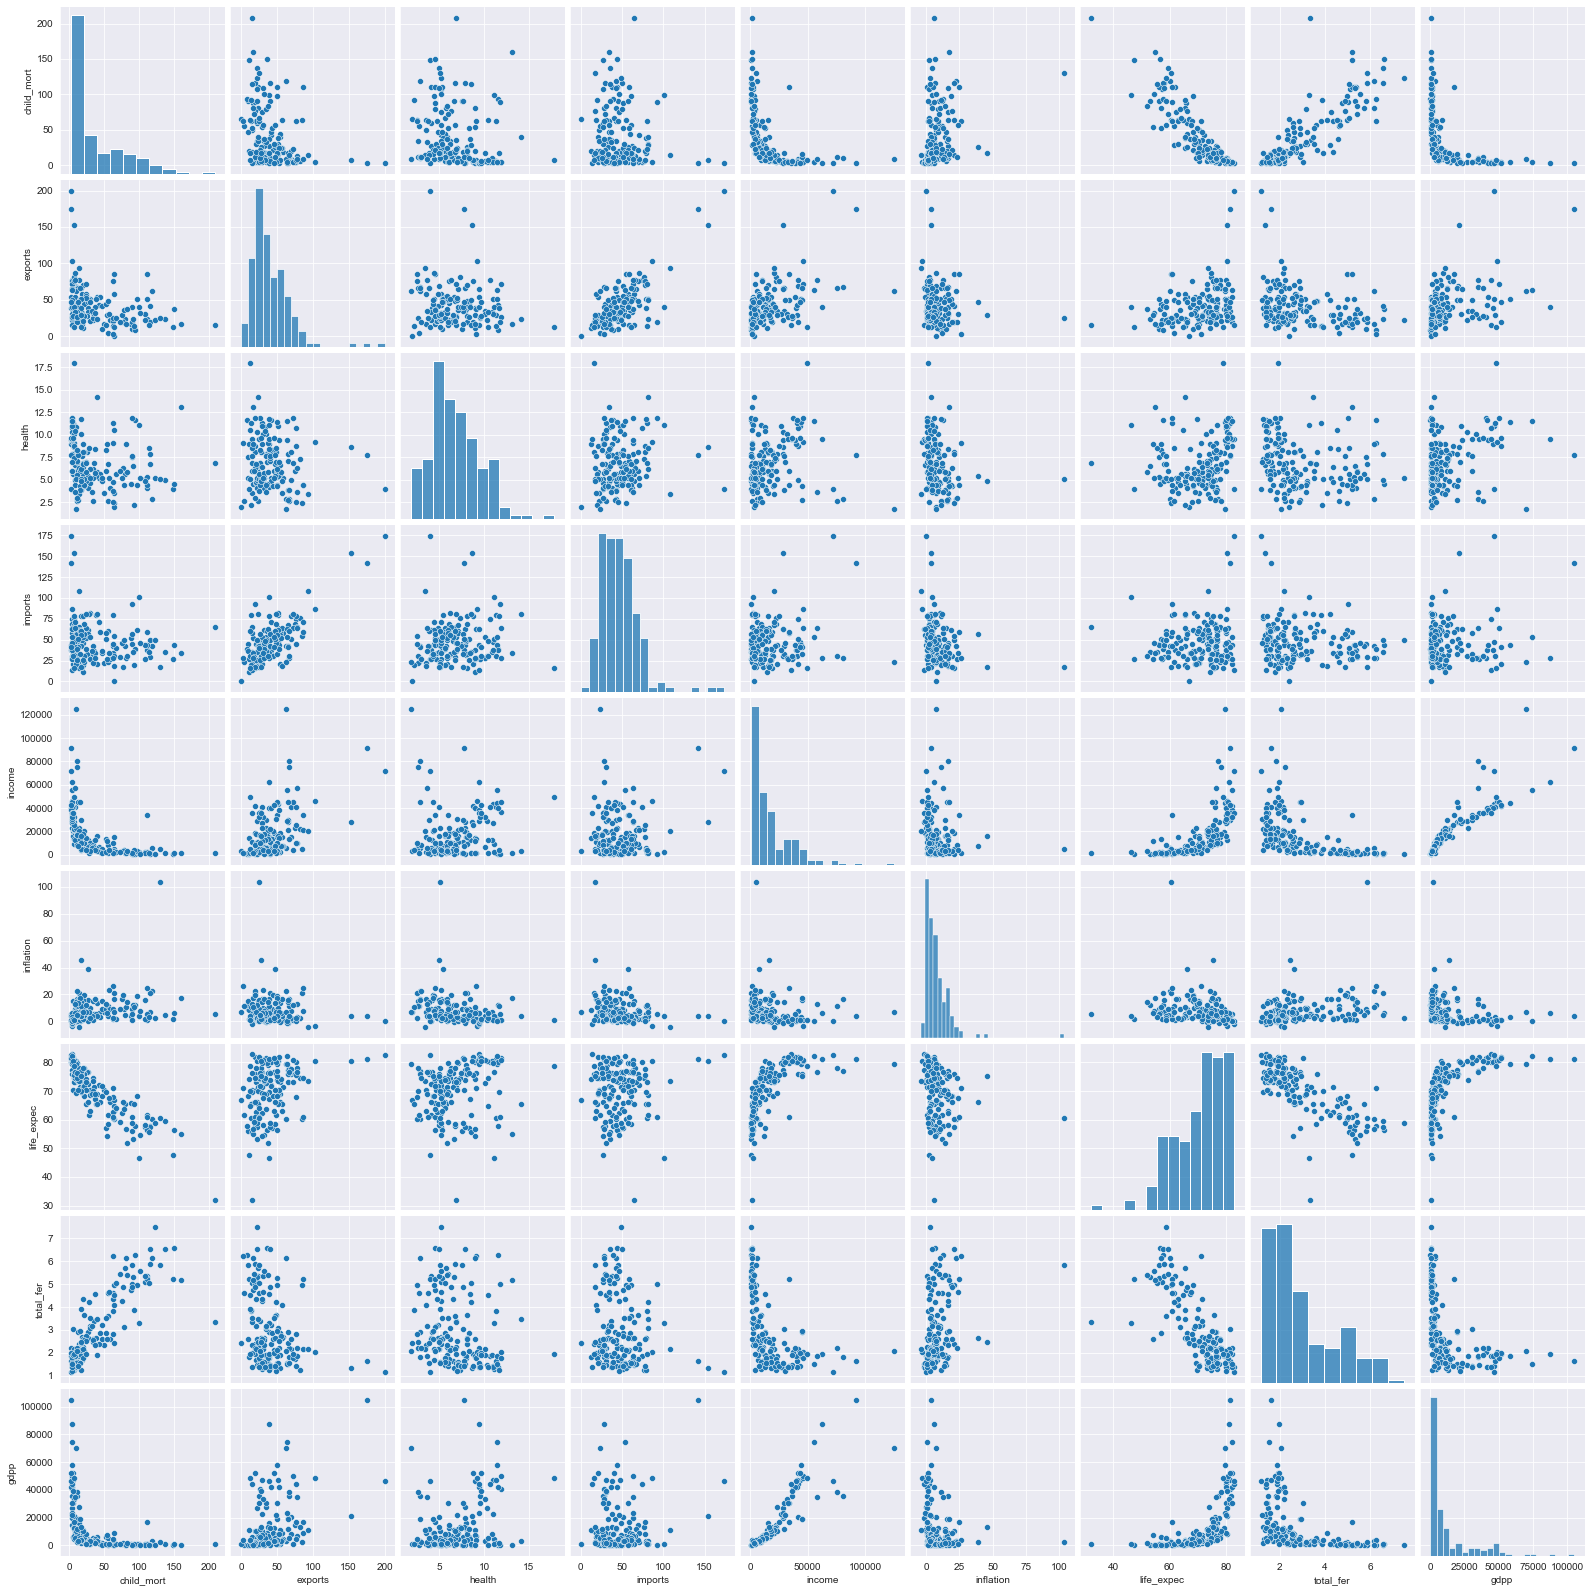

In [5]:
sns.pairplot(df) # Trying all combinations. . . 

## Checking for Multicollinearity:

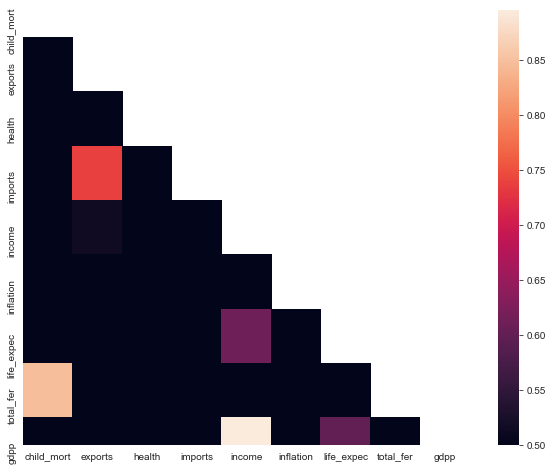

In [6]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(df.corr(), vmin=0.5, mask = mask);

# Feature Engineering:

## Scaling the Data:

In [7]:
data = df.drop('country', axis = 1)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dfx = sc.fit_transform(data)

# Modeling:

## Finding Ideal Number of Clusters:

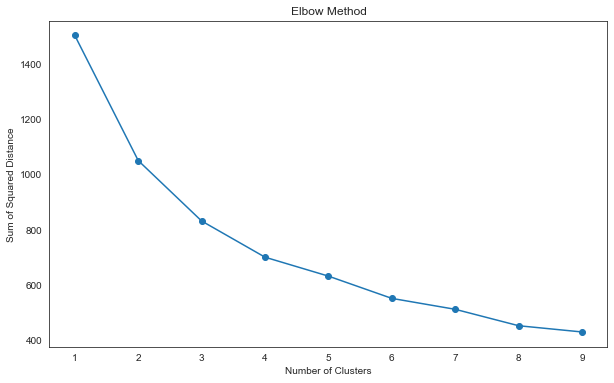

In [42]:
ssd = [] # Sum of Squared Distance
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dfx)
    ssd.append(km.inertia_) 
    
plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distance')
plt.title('Elbow Method')
plt.show()
# it looks like 3 is the answer. . . 

## KMeans:

In [43]:
from sklearn.cluster import KMeans
from sklearn import metrics
data = df.drop('country', axis = 1)

model=KMeans(n_clusters=3,random_state=42)
model.fit(dfx)
print(model.labels_)

[1 2 2 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 2 2 2 1 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 2 1 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


In [44]:
values = []
for x in model.labels_:
    values.append(x)
    
keys = []
for x in df['country']:
    keys.append(x)

In [45]:
country_dict = {}
country_dict['Countries'] = keys
country_dict['Group'] = values

In [46]:
# add labels to main df
# Practice creating new df for practice
dfi = pd.DataFrame(data = country_dict)

In [47]:
df0 = dfi[dfi.Group == 0]
df1 = dfi[dfi.Group == 1]
df2 = dfi[dfi.Group == 2]

In [49]:
#df0
#df1
df2

Countries  Group
1    Albania              2    
2    Algeria              2    
4    Antigua and Barbuda  2    
5    Argentina            2    
6    Armenia              2    
..       ...             ..    
160  Uruguay              2    
161  Uzbekistan           2    
162  Vanuatu              2    
163  Venezuela            2    
164  Vietnam              2    

[84 rows x 2 columns]

In [50]:
print('Group 0:', len(df0))
print('Group 1:', len(df1))
print('Group 2:', len(df2))
# Much more even now with the scaling. . . 

Group 0: 36
Group 1: 47
Group 2: 84


# Visualizing Results:

## Scatter Plots of Important Features:

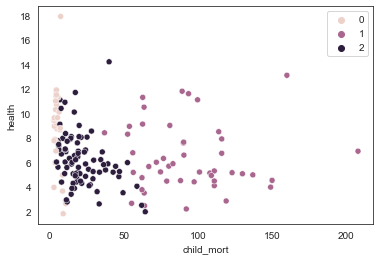

In [65]:
sns.scatterplot(data = df, x = "child_mort", y = "health", hue = model.labels_);

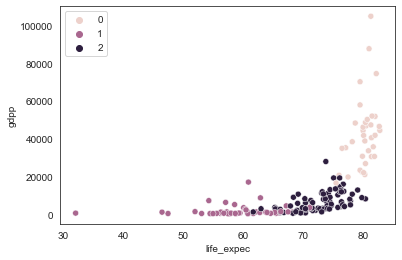

In [64]:
sns.scatterplot(data = df, x = "life_expec", y = "gdpp", hue = model.labels_);

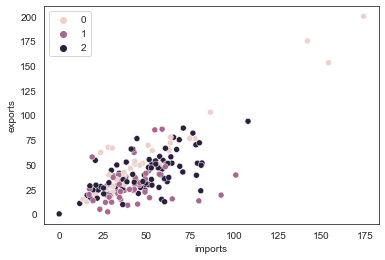

In [66]:
sns.scatterplot(data = df, x = "imports", y = "exports", hue = model.labels_);

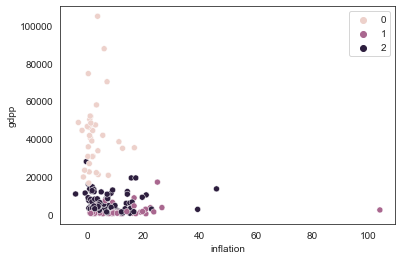

In [67]:
sns.scatterplot(data = df, x = "inflation", y = "gdpp", hue = model.labels_);

In [17]:
# Next up, work on visualizing this using a map. Perhaps Folium. . .

In [18]:
import folium

In [37]:
map = folium.Map(location=[0, 0], zoom_start=1.5)

In [32]:
map